In [54]:
import pandas as pd

In [55]:
import numpy as np

In [56]:
import matplotlib.pyplot as plt

In [57]:
gold = pd.read_csv("data/gold.csv")
silver = pd.read_csv("data/silver.csv")


In [58]:
gold.columns
silver.columns



Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='str')

In [59]:
gold.head()
gold.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='str')

In [60]:
gold['Date'] = pd.to_datetime(gold['Date'])
silver['Date'] = pd.to_datetime(silver['Date'], format='%d-%m-%Y')

In [61]:
gold.set_index('Date', inplace=True)
silver.set_index('Date', inplace=True)

gold = gold.sort_index()
silver = silver.sort_index()



In [62]:
gold.rename(columns={'Price': 'Close'}, inplace=True)
silver.rename(columns={'Price': 'Close'}, inplace=True)



In [63]:
silver['Close'] = pd.to_numeric(
    silver['Close'].astype(str).str.replace(',', ''),
    errors='coerce'
)

gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')


In [64]:
gold.index.min(), gold.index.max()
silver.index.min(), silver.index.max()

gold['Close'].dtype
silver['Close'].dtype


dtype('int64')

In [65]:
start_date = max(gold.index.min(), silver.index.min())
end_date = min(gold.index.max(), silver.index.max())

start_date, end_date

(Timestamp('2014-01-01 00:00:00'), Timestamp('2024-08-30 00:00:00'))

In [66]:
gold_aligned = gold.loc[start_date:end_date]
silver_aligned = silver.loc[start_date:end_date]


In [67]:
gold_aligned['returns'] = gold_aligned['Close'].pct_change()
silver_aligned['returns'] = silver_aligned['Close'].pct_change()


In [68]:
print(gold_aligned.head())
print(gold_aligned.columns)


            Close   Open   High    Low  Volume  Chg%   returns
Date                                                          
2014-01-01  29542  29435  29598  29340    2930  0.25       NaN
2014-01-02  29975  29678  30050  29678    3140  1.47  0.014657
2014-01-03  29727  30031  30125  29539    3050 -0.83 -0.008274
2014-01-04  29279  29279  29279  29279       0 -1.51 -0.015070
2014-01-06  29119  29300  29395  29051   24380 -0.55 -0.005465
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Chg%', 'returns'], dtype='str')


In [69]:
window = 252

gold_aligned['volatility'] = (
    gold_aligned['returns']
    .rolling(window)
    .std() * np.sqrt(252)
)

silver_aligned['volatility'] = (
    silver_aligned['returns']
    .rolling(window)
    .std() * np.sqrt(252)
)


In [70]:
silver_aligned['Close'].dtype


dtype('int64')

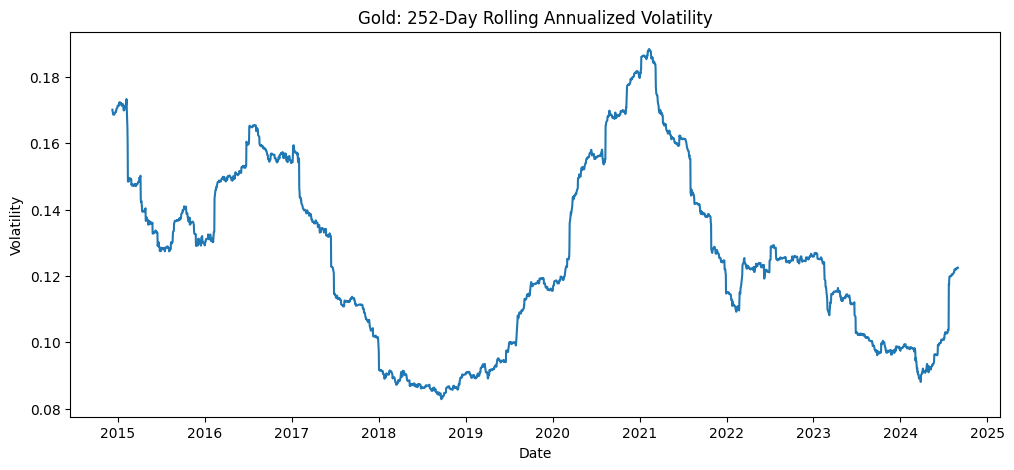

In [71]:
plt.figure(figsize=(12,5))
plt.plot(gold_aligned.index, gold_aligned['volatility'])
plt.title("Gold: 252-Day Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()



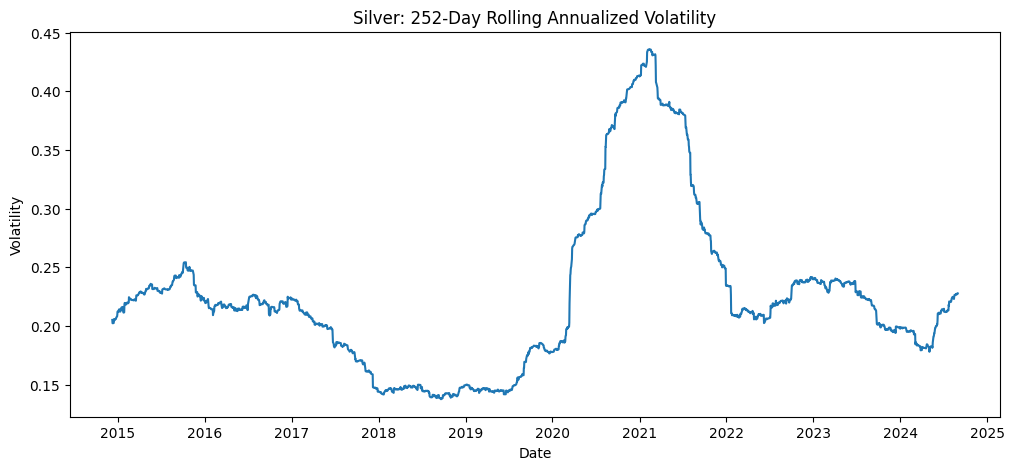

In [72]:
plt.figure(figsize=(12,5))
plt.plot(silver_aligned.index, silver_aligned['volatility'])
plt.title("Silver: 252-Day Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


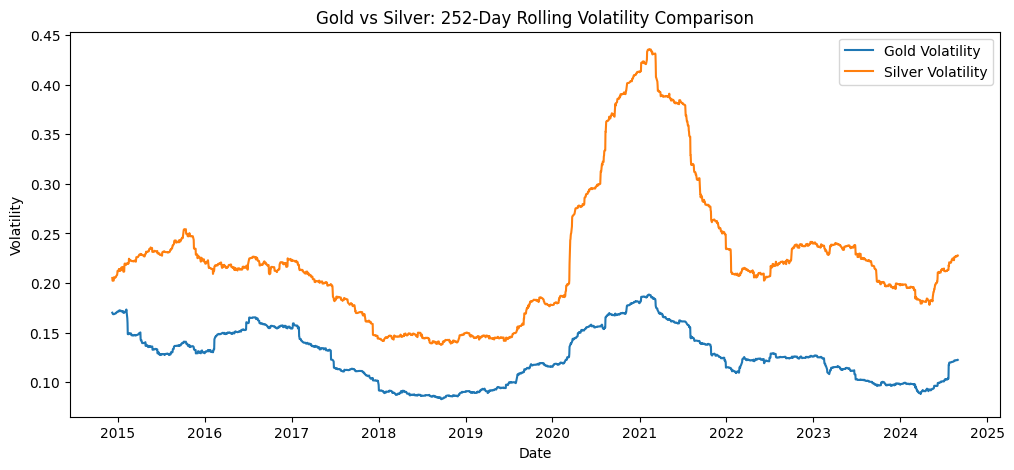

In [73]:
plt.figure(figsize=(12,5))
plt.plot(gold_aligned.index, gold_aligned['volatility'], label='Gold Volatility')
plt.plot(silver_aligned.index, silver_aligned['volatility'], label='Silver Volatility')
plt.title("Gold vs Silver: 252-Day Rolling Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


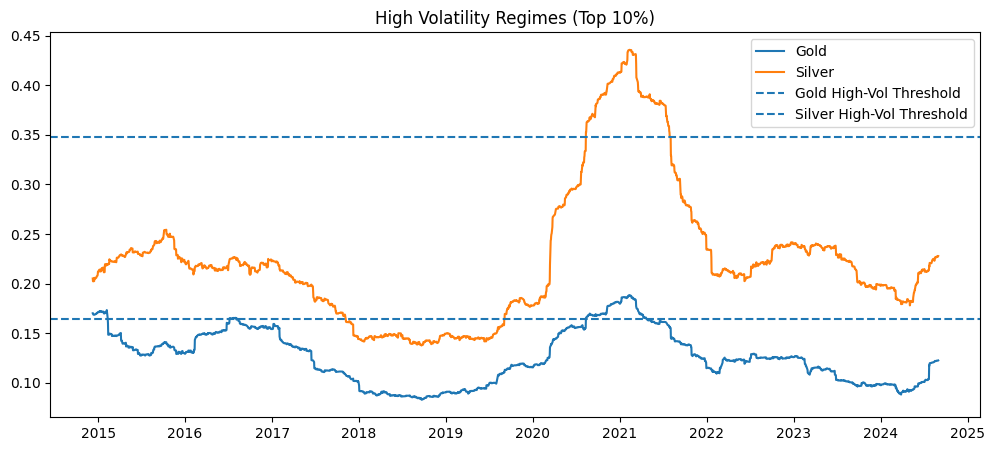

In [74]:
gold_threshold = gold_aligned['volatility'].quantile(0.90)
silver_threshold = silver_aligned['volatility'].quantile(0.90)

plt.figure(figsize=(12,5))
plt.plot(gold_aligned.index, gold_aligned['volatility'], label='Gold')
plt.plot(silver_aligned.index, silver_aligned['volatility'], label='Silver')

plt.axhline(gold_threshold, linestyle='--', label='Gold High-Vol Threshold')

plt.axhline(silver_threshold, linestyle='--', label='Silver High-Vol Threshold')

plt.title("High Volatility Regimes (Top 10%)")
plt.legend()
plt.show()


In [75]:
## Task 2: Price Band Construction


In [76]:
## Using 200 day average and bands using z-score (the preffered way)

In [77]:
gold.head()
silver.head()


,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-01-01,43876,"43,870","44,034","43,735",2.30K,0.10%
2014-01-02,45348,"44,000","45,500","44,000",30.70K,3.35%
2014-01-03,45475,"45,300","45,729","45,064",24.57K,0.28%
2014-01-04,45475,"45,475","45,475","45,475",NaN,0.00%
2014-01-06,45370,"45,421","45,740","45,033",27.42K,-0.23%


In [78]:
""" Methodology
A 200-day moving average is used to represent the long-term price trend.  
Rolling standard deviation over the same window captures time-varying volatility.  
Upper and lower price bands are constructed at -+2 standard deviations from the trend,  
representing statistically extreme price zones."""


' Methodology\nA 200-day moving average is used to represent the long-term price trend.  \nRolling standard deviation over the same window captures time-varying volatility.  \nUpper and lower price bands are constructed at -+2 standard deviations from the trend,  \nrepresenting statistically extreme price zones.'

In [79]:
print(gold.columns)


Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='str')


In [80]:
gold = gold.rename(columns={'Close': 'Price'})
silver = silver.rename(columns={'Close': 'Price'})


In [81]:
window = 200

gold['MA_200'] = gold['Price'].rolling(window).mean()
gold['STD_200'] = gold['Price'].rolling(window).std()

gold['Upper_Band'] = gold['MA_200'] + 2 * gold['STD_200']
gold['Lower_Band'] = gold['MA_200'] - 2 * gold['STD_200']
gold['Zscore'] = (gold['Price'] - gold['MA_200']) / gold['STD_200']

gold[['Price','MA_200','Zscore','Upper_Band','Lower_Band']].tail()



,Price,MA_200,Zscore,Upper_Band,Lower_Band
Date,,,,,
2025-12-29,132595,106689.33,1.837594,134884.530205,78494.129795
2025-12-30,133974,106916.38,1.909540,135255.793998,78576.966002
2025-12-31,135454,107150.42,1.985834,135655.897819,78644.942181
2026-01-01,135771,107390.35,1.980672,136047.946551,78732.753449
2026-01-02,135793,107632.75,1.955933,136427.444003,78838.055997


In [82]:
gold[['Price','MA_200','Upper_Band','Lower_Band']].tail()


,Price,MA_200,Upper_Band,Lower_Band
Date,,,,
2025-12-29,132595,106689.33,134884.530205,78494.129795
2025-12-30,133974,106916.38,135255.793998,78576.966002
2025-12-31,135454,107150.42,135655.897819,78644.942181
2026-01-01,135771,107390.35,136047.946551,78732.753449
2026-01-02,135793,107632.75,136427.444003,78838.055997


In [83]:
silver['MA_200'] = silver['Price'].rolling(window).mean()
silver['STD_200'] = silver['Price'].rolling(window).std()
silver['Zscore'] = (silver['Price'] - silver['MA_200']) / silver['STD_200']
silver['Upper_Band'] = silver['MA_200'] + 2 * silver['STD_200']
silver['Lower_Band'] = silver['MA_200'] - 2 * silver['STD_200']
silver[['Price','MA_200','Zscore','Upper_Band','Lower_Band']].tail()



,Price,MA_200,Zscore,Upper_Band,Lower_Band
Date,,,,,
2024-08-26,85668,79869.510,0.759276,95143.251009,64595.768991
2024-08-27,85658,79935.940,0.750030,95194.151597,64677.728403
2024-08-28,83977,79989.025,0.523353,95229.127729,64748.922271
2024-08-29,84872,80047.685,0.633760,95272.114904,64823.255096
2024-08-30,84300,80105.965,0.551857,95305.677903,64906.252097


In [84]:
#underpreffered way??